In [1]:
# Download the modules 
import pandas as pd
import tensorflow as tf    
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Assign the variables 
IMAGE_SIZE = 128
BATCH_SIZE = 16
CHANNEL = 3
EPOCHS = 30
train_split_size = 0.8
test_split_size = 0.1
validate_split_size = 0.1


INPUT_SHAPE = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNEL)
ACTIVATION = 'relu'
KERNAL_SIZE = 3
FILTER_SIZE = 3
POLLING_SIZE = 2
DENSE_ACTIVATION = 'softmax'
n_classes = 10

OPTIMIZER = 'adam'
METRICS = 'accuracy'
VERBOSE = 1

images_directory_name = "kaggle_dataset"
model_save_path = "saved_models/"

In [5]:
# Download the dataset into the tensorflow dataset
# Check your directory should be in the below format 

# kaggle_dataset
# .....Tomato__Target_Spot
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato__Tomato_mosaic_virus
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato__Tomato_YellowLeaf__Curl_Virus
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_Bacterial_spot
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_Early_blight
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_healthy
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_Late_blight
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_Leaf_Mold
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_Septoria_leaf_spot
#       ..... image_1.jpg
#       ..... image_2.jpg
# .....Tomato_Spider_mites_Two_spotted_spider_mite
#       ..... image_1.jpg
#       ..... image_2.jpg

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    images_directory_name,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


Found 16011 files belonging to 10 classes.


In [ ]:
dataset.classes()

In [6]:
# Check the name for the three classes it should be same as the folder classes
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
# Check the length of the dataset 
# It should be number of images actual in the directory-  
# Beacuse every element is the batch of tha batch size
# last batch size it not having exact 32 iamges thats why this number showing graeter value

len(dataset)

1001


  Batch_size images shape:- (16, 128, 128, 3)

 Labels with repective 2 image:- [5 0 2 4 3 0 2 0 7 9 6 7 2 2 1 9]

 Print the first image :- In Tensorflow 
tf.Tensor(
[[[137.75 127.75 135.75]
  [137.25 127.25 135.25]
  [135.   125.   133.  ]
  ...
  [197.5  190.5  197.5 ]
  [189.5  182.5  189.5 ]
  [191.5  184.5  191.5 ]]

 [[135.   125.   133.  ]
  [131.5  121.5  129.5 ]
  [135.25 125.25 133.25]
  ...
  [170.   163.   170.  ]
  [185.5  178.5  185.5 ]
  [177.75 170.75 177.75]]

 [[121.   111.   119.  ]
  [118.25 108.25 116.25]
  [128.25 118.25 126.25]
  ...
  [187.5  180.5  187.5 ]
  [189.5  182.5  189.5 ]
  [163.   156.   163.  ]]

 ...

 [[117.25 111.25 123.25]
  [116.25 110.25 122.25]
  [127.25 121.25 133.25]
  ...
  [131.5  126.5  146.5 ]
  [133.75 128.75 148.75]
  [139.   134.   154.  ]]

 [[116.5  110.5  122.5 ]
  [111.25 105.25 117.25]
  [111.   105.   117.  ]
  ...
  [138.25 133.25 153.25]
  [142.75 137.75 157.75]
  [132.75 127.75 147.75]]

 [[113.75 107.75 119.75]
  [108.   1

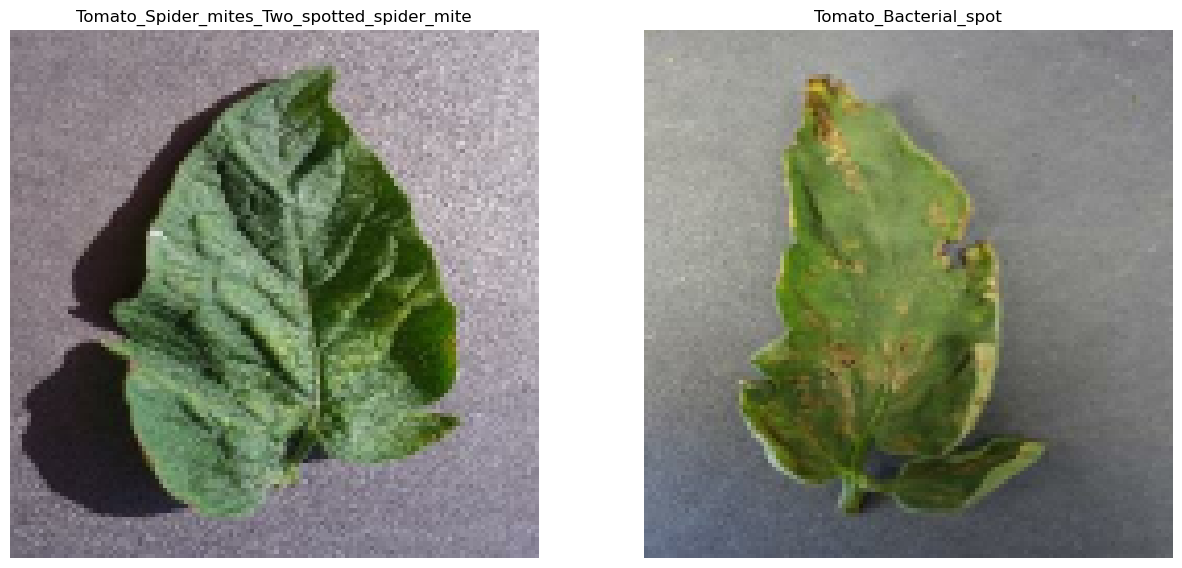

In [8]:
# Load the one batch of the images and labels
plt.figure(figsize = (15,15))

for image_batch , label_batch in dataset.take(1):
    print('\n  Batch_size images shape:-' , image_batch.shape)
    print('\n Labels with repective 2 image:-',label_batch.numpy())
    
    print("\n Print the first image :- In Tensorflow ")
    print(image_batch[0])
    
    print("\n Print the first iamge :- In Numpy ")
    print(image_batch[0].numpy())
    
    print("\n Visualize the first 12 images:-")
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    
    

In [9]:
# Split our dataset into Train, Test and validation dataset
# Train dataset split--> 80%
# Test dataset split--> 10%
# Validation dataset split--> 10%


def train_test_split(dataset , train_size = 0.8, validate_size = 0.1,  test_size = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(dataset)
    
    if shuffle :
        dataset = dataset.shuffle(shuffle_size , seed =12)
        
    train_length = int( ds_size * train_size)
    val_length = int(ds_size * validate_size)
    
    
    train_dataset = dataset.take(train_length)
    remain_dataset = dataset.skip(train_length)    
   
    validate_dataset = remain_dataset.take(val_length)
    test_dataset =  remain_dataset.skip(val_length)
    
    return train_dataset , validate_dataset, test_dataset  

In [10]:
train_dataset , validate_dataset, test_dataset  = train_test_split(dataset , 
                                                                   train_size = train_split_size, 
                                                                   validate_size = validate_split_size,
                                                                   test_size = test_split_size)

In [11]:
# To increase the performance of the pipeline
# Perform Caching - It will read the image from menory after the first read
# prefetching -- save the time reading the images

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validate_dataset = validate_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
# Preprocessing pipeline
# 1. Resize Image bys the IMAGE_SIZE - help while testing
# 2. Rescale Imge by Divind the 255

resize_rescale_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [13]:
# Data augumentation
# Perform horizontal and vertical flip and rotatation.
# Here I have added another augumentation that is Zoom

data_augumentation_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2), 
    layers.experimental.preprocessing.RandomZoom(0.5, 0.2)
    
])

In [15]:
# Create the convolution Neural Network Model
# The layers used in the CNN model are 
# -----convolution layers
# -----Max pooling layers
# -----Flatten layer
# -----Dense layer -> softmax function normalize the probability of the classes


model = models.Sequential([
    resize_rescale_layer,
    data_augumentation_layer,
    layers.Conv2D(32,(FILTER_SIZE,FILTER_SIZE), activation = ACTIVATION, input_shape = INPUT_SHAPE),
    layers.MaxPooling2D((POLLING_SIZE,POLLING_SIZE)),
    layers.Conv2D(64 , kernel_size = (KERNAL_SIZE, KERNAL_SIZE), activation = ACTIVATION),
    layers.MaxPooling2D((POLLING_SIZE,POLLING_SIZE)),
    layers.Conv2D(64 , kernel_size = (KERNAL_SIZE,KERNAL_SIZE), activation = ACTIVATION),
    layers.MaxPooling2D((POLLING_SIZE,POLLING_SIZE)),
    layers.Conv2D(64 , (FILTER_SIZE,FILTER_SIZE) , activation = ACTIVATION),
    layers.MaxPooling2D((POLLING_SIZE,POLLING_SIZE)),
    layers.Conv2D(64 , (FILTER_SIZE,FILTER_SIZE) , activation = ACTIVATION),
    layers.MaxPooling2D((POLLING_SIZE,POLLING_SIZE)),
    layers.Flatten(),
    layers.Dense(n_classes , activation = DENSE_ACTIVATION)  
])

model.build(input_shape = INPUT_SHAPE)

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 128, 128, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [17]:
# Compile the model
model.compile(
    optimizer = OPTIMIZER,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = [METRICS],
)

In [18]:
# Train user model after compile
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = VERBOSE ,
    validation_data = validate_dataset,    
)

Epoch 1/30
800/800 [==============================] - 113s 88ms/step - loss: 1.5242 - accuracy: 0.4756 - val_loss: 1.1728 - val_accuracy: 0.6069
Epoch 2/30
800/800 [==============================] - 59s 73ms/step - loss: 0.9477 - accuracy: 0.6739 - val_loss: 1.0892 - val_accuracy: 0.6313
Epoch 3/30
800/800 [==============================] - 57s 72ms/step - loss: 0.7175 - accuracy: 0.7591 - val_loss: 0.9386 - val_accuracy: 0.6925
Epoch 4/30
800/800 [==============================] - 56s 70ms/step - loss: 0.5767 - accuracy: 0.8025 - val_loss: 0.7886 - val_accuracy: 0.7163
Epoch 5/30
800/800 [==============================] - 56s 70ms/step - loss: 0.4892 - accuracy: 0.8313 - val_loss: 0.6558 - val_accuracy: 0.7719
Epoch 6/30
800/800 [==============================] - 57s 71ms/step - loss: 0.4371 - accuracy: 0.8492 - val_loss: 0.5152 - val_accuracy: 0.8331
Epoch 7/30
800/800 [==============================] - 57s 71ms/step - loss: 0.3739 - accuracy: 0.8707 - val_loss: 0.6133 - val_accuracy

In [19]:
# Run on the Test dataset to check the model accuracy
model.evaluate(test_dataset)

101/101 [==============================] - 20s 4ms/step - loss: 0.2801 - accuracy: 0.9146


[0.28012368083000183, 0.9146039485931396]

In [20]:
# History --> It is keras callback history

accuracy = history.history['accuracy']
vaidation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

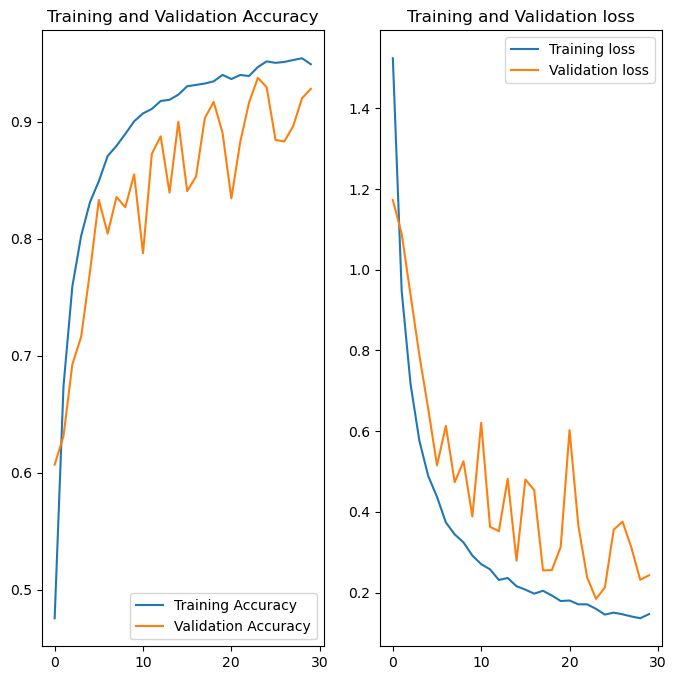

In [21]:
# Plot the Training and Validation Accuracy chart

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy , label = 'Training Accuracy')
plt.plot(range(EPOCHS), vaidation_accuracy , label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

# Plot the Training and Validation loss chart
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label = 'Training loss')
plt.plot(range(EPOCHS), validation_loss , label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')

First Image to predict:--

 Actual Label for the first image :- Tomato_healthy
1/1 [==============================] - 0s 167ms/step
Predicted Label for the first image :- Tomato_healthy


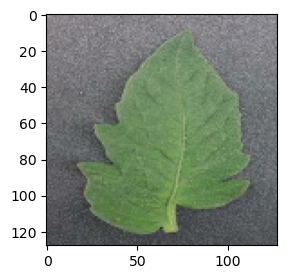

In [22]:
# Predict the test images 
for image_batch , label_batch in test_dataset.take(1):
    plt.figure(figsize=(3,3))
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to predict:--")
    plt.imshow(first_image)
    print("\n Actual Label for the first image :-", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    predicted_label_first = class_names[np.argmax(batch_prediction[0])]
    print("Predicted Label for the first image :-",predicted_label_first)    
    


In [23]:
# Create function to predict the image with specific model

def predict(model , images):
    img_array = tf.keras.preprocessing.image.img_to_array(images) # Converted image to array
    img_array = tf.expand_dims(img_array , 0) # Created batch 
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])) ,2)
    return predicted_class , confidence

1/1 [==============================] - 0s 20ms/step


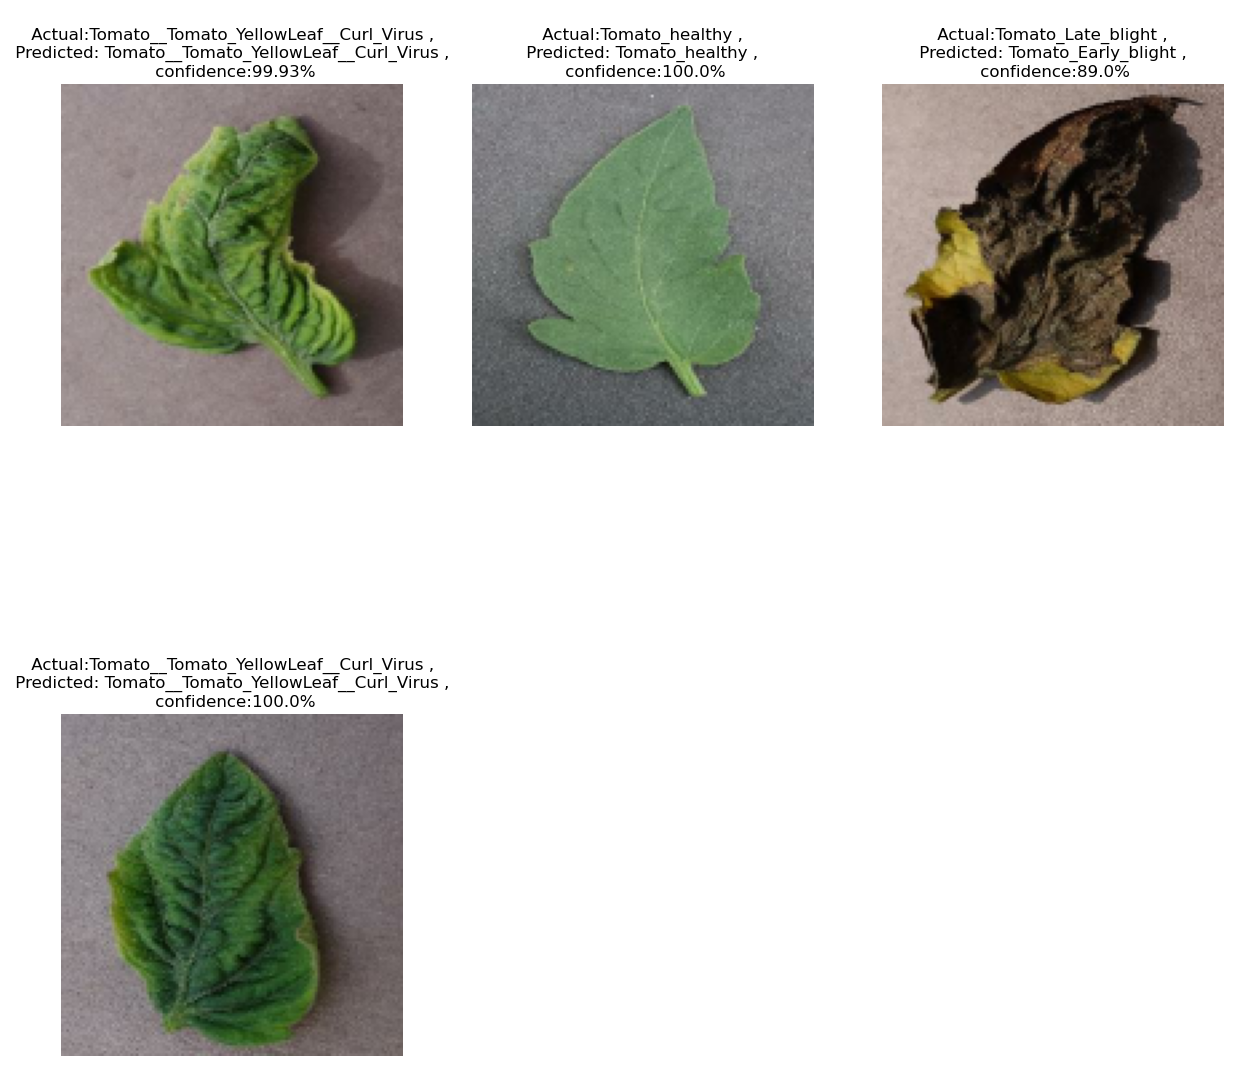

In [24]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in test_dataset.take(1):
    for i in range(4):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(model , image_batch[i].numpy())
        actual_class = class_names[label_batch[i]]
        
        plt.title(f"\n Actual:{actual_class} , \n Predicted: {predicted_class} , \n confidence:{confidence}%")
        plt.axis('off')

In [26]:
# save Models  
# Model version will be auto increment 

# model_version = max(int(i) for i in os.listdir(model_save_path) ) + 1
model.save(f"{model_save_path}1")